### Programming for Psychologists (2024/2025)
## Home Assignment - Brain Imaging for Schizophrenia
**Course code:** M_PROPSY\
**Course coordinator:** Matthias Nau\
**Teaching assistant:** Anna van Harmelen\
**Student:** Marina Saraiva Mendes\
**Date:** 26/11/2024

This is a home assignment for the course *Programming for Psychologists*, at the Vrije Universiteit of Amsterdam. It consists of analysis of fMRI data to examine brain activity associated with schizophrenia. The dataset used was sourced from [NeuroSynth](https://neurosynth.org/analyses/terms/schizophrenia/), a platform for meta-analytic studies of the brain.

For the analysis, two files were used, which can be easily downloaded from the above-mentioned website, in the sections `schizophrenia: uniformity test`, and `anatomical`.

### Loading the files
The fMRI data and the corresponding anatomical data were loaded using the [Nilearn](https://nilearn.github.io/stable/index.html) library. The file paths were identified using the **glob** module, which searches for files matching specific patterns. In this case: `*01.nii` for the functional MRI data, and `*anatomical.nii` for the anatomical image.

**Note:** The fMRI and anatomical image files were saved in the same directory as the Python script in Visual Studio Code, which made it easier for the glob module to find and load them without requiring explicit directory paths.

In [66]:
import glob
from nilearn.image import load_img

anatomical_image = load_img(glob.glob("*anatomical.nii"))
functional_image = load_img(glob.glob("*schizophrenia_uniformity-test_z_FDR_0.01.nii"))

#Note: If you haven't extracted the zip files, as I did, make sure to update the file extensions to ".nii.gz".

### Plotting the functional data on top of the anatomical scan

In this section, we use [plotting.plot_stat_map](https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_stat_map.html) to visualize brain activation for schizophrenia. The arguments provided include:
- **stat_map_img**: This is the fMRI image to be plotted, corresponding to the brain activity.
- **bg_img**: The anatomical image is used as a background for the statistical map.
- **colorbar = True**: This adds a color bar to the plot, seen on the right corner.
- **title**: The title of the plot.
- **black_bg = True**: The background of the plot is set to black, improving contrast.
- **cmap = "afmhot"**: The color map used. In this case, a red-yellow-black gradient.
- **threshold = 0.1**: The voxel threshold is set at 0.1, so only regions with a statistical significance greater than 0.1 are visualized.
- **cut_coords**: The coordinates at which to cut the brain. This is arbitrary, but the ones chosen are representatives of this specific functional data.

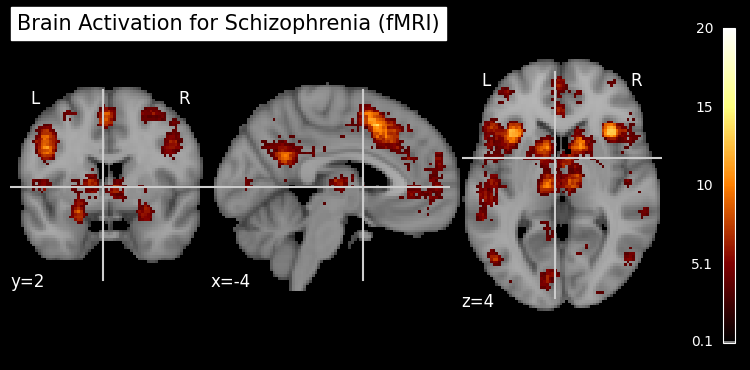

In [67]:
from nilearn import plotting

plotting.plot_stat_map(stat_map_img=functional_image,
                       bg_img=anatomical_image,
                       colorbar=True,
                       title="Brain Activation for Schizophrenia (fMRI)",
                       black_bg=True,
                       cmap="afmhot",
                       threshold=0.1,
                       cut_coords=(-4,2,4))

plotting.show()

### Plotting a histogram of the functional data

For that, we will use Matplotlib's [pyplot.hist](https://matplotlib.org/stable/index.html). These are the arguments provided:
- **x = functional_data [functional_data > 0]:** The input here is set for only positive values within the functional data.
- **bins = 50:** Bins are the ranges of values that the data is grouped into, with fewer bins resulting in a more general view.
- **color:** Specifies the color of the bars in the histogram.
- **edgecolor:** Sets the color of the borders of the bars.

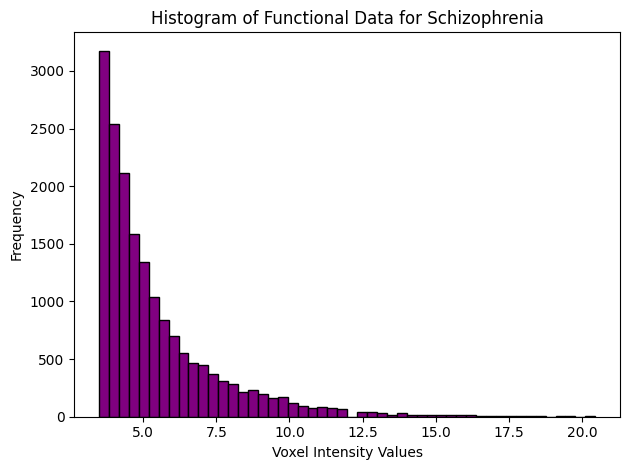

In [ ]:
import matplotlib.pyplot as plt

#Since the data, rather than the image itself, will be used for plotting the histogram, we use the "get_fdata" function to extract it
functional_data = load_img(functional_image).get_fdata()

plt.hist(x=functional_data[functional_data > 0],
         bins=50,
         color="purple",
         edgecolor="black")
plt.title("Histogram of Functional Data for Schizophrenia")
plt.xlabel("Voxel Intensity Values")
plt.ylabel("Frequency")
plt.tight_layout() #This one is optional, only for improving the layout

plt.show()

#### Thank you!
##### Please reach out if you have any further questions or suggestions!